In [1]:
## seeding
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as  tf
tf.random.set_seed(0)

In [4]:
### importing necessary libraries
import pandas as pd
import tensorflow as tf
import os
from zipfile import ZipFile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import json

In [5]:
## DATA CURATION
kaggle_credentials =  json.load(open('/content/kaggle.json'))
## loading the kaggle credentials as an os environment
os.environ['Kaggle_Username']  =  kaggle_credentials['username']
os.environ['Kaggle_key']  =  kaggle_credentials['key']

In [6]:
## loading the data
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:02<00:00, 21.7MB/s]
100% 25.7M/25.7M [00:02<00:00, 12.1MB/s]


In [7]:
## checking the items in space drive
!ls

drive  imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  sample_data


In [8]:
## unzipping the dataset
dataset = '/content/imdb-dataset-of-50k-movie-reviews.zip'
with ZipFile(dataset , 'r')  as zip:
  zip.extractall()
  print('done')

done


In [9]:
## loading the data
data =  pd.read_csv('/content/IMDB Dataset.csv')

In [10]:
## displaying the data
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
## checking the shape
data.shape

(50000, 2)

In [12]:
## checking the distribution of the sentiment column in the data frame
data['sentiment'].value_counts(normalize=True)
## the data is equally distributed

,proportion
sentiment,
positive,0.5
negative,0.5


In [76]:
### encoding the sentiment columns
data.replace({"sentiment":{"positive":1,"negative":0}},inplace=True)

In [77]:
## checking the distribution again
data['sentiment'].value_counts(normalize= True)

,proportion
sentiment,
0,0.5
1,0.5


In [78]:
## splitting the data
train_data , test_data =  train_test_split(data , test_size=0.2 , random_state=0)

In [79]:
## checking the distribution of the data
train_data.shape , test_data.shape

((40000, 2), (10000, 2))

In [80]:
### DATA PREPROCESSING
## Initialize the Tokenizer by passing into a variable
tokenizer =  Tokenizer(num_words=5000)
## fitting the tokenizer on the train data
tokenizer.fit_on_texts(train_data['review'])
## applying the tokenizer sequentially
sequence = tokenizer.texts_to_sequences(train_data['review'])
pad_sequence =   pad_sequences(sequence , maxlen= 200)
x_train =   pad_sequence
sequence1 =   tokenizer.texts_to_sequences(test_data['review'])
pad_sequence1 =   pad_sequences(sequence1 , maxlen= 200)
x_test =     pad_sequence1

In [82]:
x_train

array([[   0,    0,    0, ...,    6,  681,   68],
       [  21,  335, 1825, ...,   72,  681, 1419],
       [   7,    9,   45, ...,    7,  701,  155],
       ...,
       [   0,    0,    0, ...,    1,   79,  661],
       [   0,    0,    0, ...,    3, 2550, 1419],
       [   0,    0,    0, ...,  265,  853,  267]], dtype=int32)

In [83]:
x_test

array([[   0,    0,    0, ...,    4,    1,  278],
       [   0,    0,    0, ...,   52,   52,  346],
       [   0,    0,    0, ...,   41,   11,   56],
       ...,
       [  71,    3,  592, ...,  297,  715,  440],
       [   0,    0,    0, ...,  412,   26,   50],
       [   0,    0,    0, ...,   32,  310, 1360]], dtype=int32)

In [84]:
### loading the variables
Y_train =  train_data['sentiment']
Y_test  =    test_data['sentiment']

In [85]:
Y_train

,sentiment
20330,1
17532,1
45819,0
34807,0
31888,1
...,...
21243,0
45891,0
42613,0
43567,1


In [86]:
Y_test

,sentiment
11841,0
19602,1
45519,1
25747,0
42642,0
...,...
25091,1
27853,1
47278,0
37020,0


In [90]:
### BUILDING THE MODEL
model =  Sequential()
## the first layer of the which is thee Embedding Layer
model.add(Embedding(input_dim=5000 , output_dim=128 ,input_length=200))
model.add(LSTM(128 , dropout= 0.7 ,activation='sigmoid' , recurrent_dropout=0.8))
model.add(Dense(1 , activation='sigmoid'))

In [91]:
## Compiling the network
model.compile(optimizer='adam',loss = "binary_crossentropy",metrics=['accuracy'] )


In [92]:
## training the moodel
history =   model.fit(x_train , Y_train  , validation_split=0.2 , epochs=7,batch_size=64)

Epoch 1/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5604 - loss: 0.6720 - val_accuracy: 0.7667 - val_loss: 0.4982
Epoch 2/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7799 - loss: 0.4705 - val_accuracy: 0.8677 - val_loss: 0.3100
Epoch 3/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8613 - loss: 0.3221 - val_accuracy: 0.8804 - val_loss: 0.2868
Epoch 4/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8791 - loss: 0.2903 - val_accuracy: 0.8817 - val_loss: 0.2850
Epoch 5/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8891 - loss: 0.2696 - val_accuracy: 0.8838 - val_loss: 0.2848
Epoch 6/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8982 - loss: 0.2539 - val_accuracy: 0.8808 - val_loss: 0.2888
Epoch 7/7
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8995 - loss: 0.2457 - val_accuracy: 0.8821 - val_loss: 0.2904


In [93]:
## Evaluating the data on the test data
loss , accuracy =   model.evaluate(x_test , Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8762 - loss: 0.3073


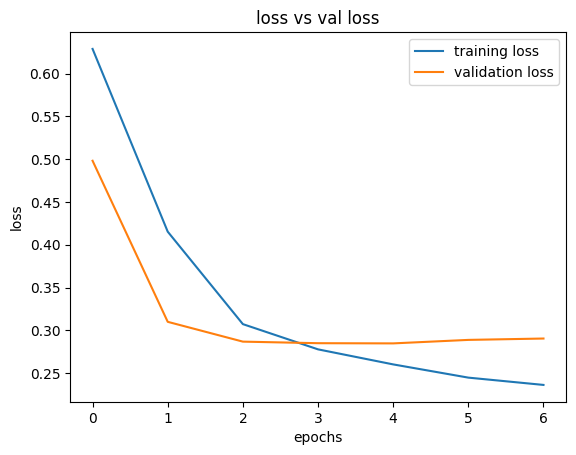

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs val loss')
plt.legend(['training loss','validation loss'], loc ='upper right')
plt.show()

In [95]:
##### BUILDING A PREDICTIVE SYSTEM
def predictive_system(review):
     sequence = tokenizer.texts_to_sequences(review)
     padded_sequence =   pad_sequences(sequence , maxlen=200)
     prediction   =  model.predict(padded_sequence)
     sequence    =  "positive" if prediction[0][0] > 0.5 else "negative"
     return sequence



In [96]:
text1 =  ' this movie was good'
predictive_system(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


'negative'

In [65]:
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


# New section

In [75]:
prediction[0]

array([0.0176773], dtype=float32)